# Setup and Pre-Processing

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist

# x has image data and y has labels
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Showing first image in color & grayscale
# plt.imshow(x_train[1])
# plt.show()
# plt.imshow(x_train[1], cmap = plt.cm.binary)
# plt.show()

"""Pre-Processing"""

# normalizing range: 0-255 -> 0-1
x_train = tf.keras.utils.normalize(x_train, axis = 1)
# print(x_train[0])
x_test = tf.keras.utils.normalize(x_test, axis = 1)

# Resizing images to make them suitable for convolution operation
## https://www.w3schools.com/python/numpy/numpy_array_reshape.asp
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # increasing one dimension for kernel, or convolution layer, operation
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Creating Deep Neural Network

In [2]:
# Training on 60000 samples of MNIST handwritten dataset
from tensorflow.keras.models import Sequential # "Sequentially" connect the layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D # These are the layers

# Creating a neural network
model = Sequential()

## First Convolution Layer
model.add(Conv2D(64, (3, 3), input_shape = x_trainr.shape[1:])) # First convolution layer: there are 64 filters each 3x3 pixels. Specifying input layer size (28, 28, 1) - we only need to do this once.
model.add(Activation("relu")) # Activation function make data non-linear: ReLU turns negative numbers to 0
# Activation functions: https://www.youtube.com/watch?v=-7scQpJT7uo
model.add(MaxPooling2D(pool_size = (2, 2))) # Maxpooling: taking maximum value within each 2x2 pixel area

## Second Convolution Layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

## Fully connected layer 1
model.add(Flatten()) # Flattening: Multi-dimensional array -> 1D array
model.add(Dense(64)) # Dense: 64 neurons are connected
model.add(Dropout(0.5))
model.add(Activation("relu"))

## Fully connected layer 2
model.add(Dense(32)) # Dense: 32 neurons are connected. Trying to get down to 10 (# of digits)
model.add(Dropout(0.5))
model.add(Activation("relu"))

## Last fully connected layer (Output layer)
model.add(Dense(10))
model.add(Activation("softmax")) # Activation function: Softmax turns vector of real values to sum to 1 so they can be read as probabilities
# In binary classification (2 things), there is one neuron in dense layer and sigmoid function is used

print(model.summary()) # Look at how the shape of output condenses

# Last step of setup
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
# what is sparse categorical crossentropy???

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

# Training the Model

In [3]:
history = model.fit(x_trainr, y_train, epochs = 12, validation_split = 0.3) # Epochs are ways to go through training data. Validation split is the fraction of data used for validation.
# When validation accuracy = accuracy, you are doing well
# When validation accuracy < accuracy, you are overfitting. Solution is to drop out some layers.

Epoch 1/12
1313/1313 [==============================] - 29s 21ms/step - loss: 0.7664 - accuracy: 0.7490 - val_loss: 0.1332 - val_accuracy: 0.9662
Epoch 2/12
1313/1313 [==============================] - 33s 25ms/step - loss: 0.3566 - accuracy: 0.8925 - val_loss: 0.0913 - val_accuracy: 0.9761
Epoch 3/12
1313/1313 [==============================] - 38s 29ms/step - loss: 0.2769 - accuracy: 0.9164 - val_loss: 0.0843 - val_accuracy: 0.9784
Epoch 4/12
1313/1313 [==============================] - 36s 27ms/step - loss: 0.2369 - accuracy: 0.9314 - val_loss: 0.0731 - val_accuracy: 0.9821
Epoch 5/12
1313/1313 [==============================] - 32s 24ms/step - loss: 0.2139 - accuracy: 0.9364 - val_loss: 0.0687 - val_accuracy: 0.9832
Epoch 6/12
1313/1313 [==============================] - 35s 27ms/step - loss: 0.1872 - accuracy: 0.9441 - val_loss: 0.0749 - val_accuracy: 0.9819
Epoch 7/12
1313/1313 [==============================] - 35s 27ms/step - loss: 0.1760 - accuracy: 0.9455 - val_loss: 0.0601 -

# Data Visualization

### Accuracy vs. Epoch

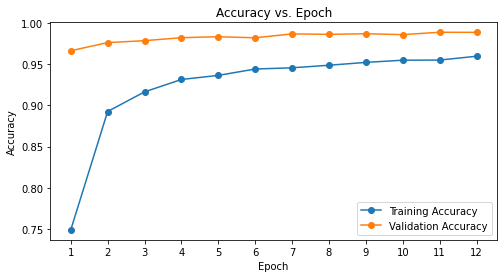

In [17]:
y_acc = history.history["accuracy"]
y_val_acc = history.history["val_accuracy"]
x_acc = range(1, len(y_acc)+1)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x_acc, y_acc, "-o", label="Training Accuracy")
ax.plot(x_acc, y_val_acc, "-o", label="Validation Accuracy")

# Title and Axes
ax.set_title("Accuracy vs. Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.set_xticks(x_acc)

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

### Loss vs. Epoch

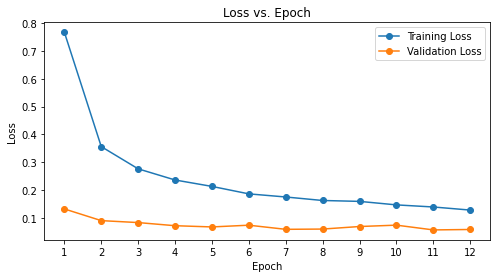

In [19]:
y_loss = history.history["loss"]
y_val_loss = history.history["val_loss"]
x_loss = range(1, len(y_loss)+1)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x_loss, y_loss, "-o", label="Training Loss")
ax.plot(x_loss, y_val_loss, "-o", label="Validation Loss")

# Title and Axes
ax.set_title("Loss vs. Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.set_xticks(x_loss)

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

In [5]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10,000 test samples:", test_loss)
print("Validation accuracy on 10,000 test samples:", test_acc)

313/313 [==============================] - 1s 5ms/step - loss: 0.0651 - accuracy: 0.9891
Test loss on 10,000 test samples: 0.06506707519292831
Validation accuracy on 10,000 test samples: 0.9890999794006348


# Predictions

In [6]:
predictions = model.predict([x_testr])

[[1.34938202e-33 3.55815497e-21 5.46756273e-16 ... 1.00000000e+00
  6.77466366e-36 8.18079506e-19]
 [1.36917097e-22 1.13583427e-18 1.00000000e+00 ... 3.37527552e-14
  5.06503044e-15 1.86714213e-22]
 [3.68339202e-13 1.00000000e+00 1.03390706e-10 ... 1.40302190e-12
  1.38808548e-10 2.19315018e-12]
 ...
 [2.75346081e-24 6.60338824e-26 1.65924506e-23 ... 3.46313942e-31
  2.34786195e-28 1.12094276e-15]
 [8.22907321e-23 2.56578376e-16 5.61313064e-16 ... 1.29922650e-21
  1.25719828e-15 9.48206700e-20]
 [1.90067601e-12 1.56638571e-33 2.32088425e-25 ... 3.70280119e-30
  3.64160972e-25 1.62076650e-29]]


Prediction: 8


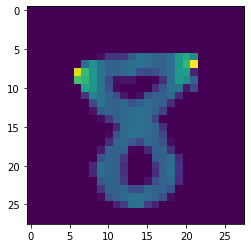

In [7]:
testnum = 128
print("Prediction:", np.argmax(predictions[testnum])) # This gets the digit that had the maximum probability
plt.imshow(x_test[testnum])

# User Input Predictions

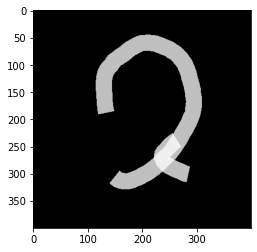

In [8]:
# Getting image from user input
import cv2
path = "C:\\Users\\eyung\\OneDrive\\Pictures\\tensorflow digit recognization samples\\number.png"
img = cv2.imread(path)
plt.imshow(img)

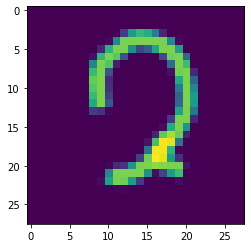

In [10]:
# Grayscale and resize to 28x28
grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(grayscaled, (28, 28), interpolation = cv2.INTER_AREA)
plt.imshow(resized)

In [11]:
# Making user input so it can be used by our model
newimg = tf.keras.utils.normalize(resized, axis = 1) # Normalization
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # increasing one dimension for kernel, or convolution layer, operation

# User input predictions
userprediction = model.predict(newimg)
topInd = np.argpartition(userprediction[0], -3)[-3:]
topInd = topInd[np.argsort(userprediction[0][topInd])][::-1]
print("Predictions (top 3): ", end="")
for i, x in enumerate(topInd):
  if i == len(topInd) - 1:
    print(x, end="")
  else:
    print(f"{x},", end=" ")

print()  # Divide Predictions from Confidence Scores

# Confidence scores
topScore = userprediction[0][topInd]
modifiedScore = [round(x*100, 2) for x in topScore]  # Create List of rounded confidence percentages
modifiedScore.sort(reverse=True)  # Sort in decending order

# Displays Confident Scores in your face
print("Confidence Scores (top 3): ", end="")
for i, x in enumerate(modifiedScore):
  if i == len(modifiedScore) - 1:
    print(f"{x}%", end="")
  else:
    print(f"{x}%,", end=" ")

Predictions (top 3): 2, 7, 3
Confidence Scores (top 3): 100.0%, 0.0%, 0.0%